# ✅Проверим наш фреймворк на небольшой задаче

In [1]:
import numpy as np

np.random.seed(0)

from tensor import Tensor
from layers import Sequential, Linear, Tanh, Sigmoid
from losses import MSELoss
from optimizer import SGD

import matplotlib.pyplot as plt

In [2]:
data = Tensor(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), autograd = True)
target = Tensor(np.array([[0], [1], [0], [1]]), autograd = True)

In [3]:
model = Sequential([Linear(2, 3), Tanh(), Linear(3, 1), Sigmoid()])
criterion = MSELoss()

optim = SGD(parameters = model.get_parameters(), alpha = 1.0)

In [4]:
loss_history = []

for i in range(10):

    pred = model.forward(data)

    loss = criterion.forward(pred, target)

    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()

    loss_history.append(loss.data[0])

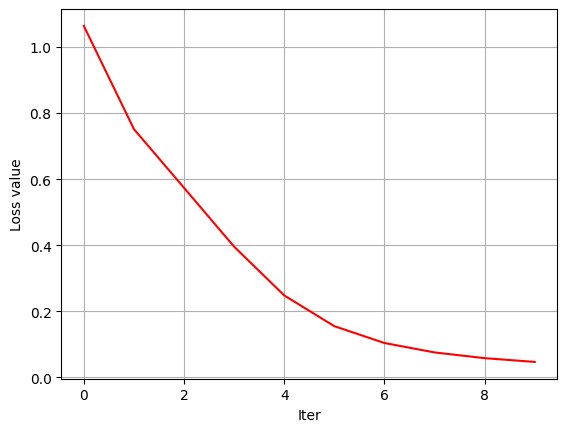

In [5]:
plt.plot(loss_history, color='red')
plt.grid(True)

plt.xlabel('Iter')
plt.ylabel('Loss value')

plt.show()

# ✅Вывод - Loss уменьшается, следовательн модель учится!